In [1]:
import pandas as pd

In [5]:
#1
survey=pd.read_excel('Sample Survey.xlsx',sheet_name="Data")

In [6]:
survey.head()

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight
0,1.0,2020-08-24,Rural,12th Pass,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26.0,Male,211.0,Gen,0.346969
1,2.0,2020-08-24,Rural,Graduate,"₹ 20,000 - ₹ 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34.0,Male,189.0,BC,0.603419
2,3.0,2020-08-24,Rural,Graduate,"₹ 5,000 - ₹ 10,000",JAP(L),BJP,Fully Dissatisfied,Somewhat Satisfied,25.0,Male,191.0,Gen,0.673762
3,4.0,2020-08-24,Urban,Graduate,"₹ 10,000 - ₹ 20,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,36.0,Male,194.0,Gen,1.101298
4,5.0,2020-08-24,Rural,Graduate,"₹ 50,000 - ₹ 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22.0,Male,176.0,BC,0.333505


In [8]:
#2
survey.groupby('collection_date').count()['response_id']

collection_date
2020-08-24    1479
2020-08-25     998
2020-08-26     598
2020-08-27     665
2020-08-28     761
2020-08-29     620
2020-08-30     582
2020-08-31     557
2020-09-01     607
Name: response_id, dtype: int64

In [12]:
def to_num(e):
    try:
        return int(e)
    except:
        return np.nan

In [13]:
#3
survey['age']=survey['age'].apply(to_num)
len(survey[survey['age']<45])/len(survey)

0.9318479685452162

In [26]:
def age_group(e):
    if(e in range(18,25)):
        return "18-25"
    if(e in range(25,40)):
        return "25-40"
    if(e in range(40,55)):
        return "40-55"
    if(e in range(55,120)):
        return "55+"

In [28]:
#4
survey['age-group']=survey['age'].apply(age_group)
survey.head()

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight,age-group
0,1.0,2020-08-24,Rural,12th Pass,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,Male,211.0,Gen,0.346969,25-40
1,2.0,2020-08-24,Rural,Graduate,"₹ 20,000 - ₹ 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,Male,189.0,BC,0.603419,25-40
2,3.0,2020-08-24,Rural,Graduate,"₹ 5,000 - ₹ 10,000",JAP(L),BJP,Fully Dissatisfied,Somewhat Satisfied,25,Male,191.0,Gen,0.673762,25-40
3,4.0,2020-08-24,Urban,Graduate,"₹ 10,000 - ₹ 20,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,36,Male,194.0,Gen,1.101298,25-40
4,5.0,2020-08-24,Rural,Graduate,"₹ 50,000 - ₹ 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,Male,176.0,BC,0.333505,18-25


In [34]:
#5
q5=survey.groupby('age-group').count()
q5

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight
age-group,,,,,,,,,,,,,,
18-25,2093,2093,2093,2093,2093,2093,2093,2093,2093,2093,2093,2093,2093,2093
25-40,3844,3844,3844,3844,3844,3844,3844,3844,3844,3844,3844,3844,3844,3844
40-55,801,801,801,801,801,801,801,801,801,801,801,801,801,801
55+,128,128,128,128,128,128,128,128,128,128,128,128,128,128


In [36]:
#5
print("Max ",max(q5['response_id']))

Max  3844


In [37]:
#6
print("Ans",len(survey[(survey['Past_Vote']=='RJD') & (survey['Vote_Now']=='RJD')])/len(survey))

Ans 0.1181010630551915


In [61]:
#7
FS=survey[survey['CM_satisfaction'] == "Fully Satisfied"].groupby("collection_date").size()
FS=list(FS)
TT=survey.groupby('collection_date').size()
TT=list(TT)
import numpy as np
np.array(FS)/np.array(TT)

[1479, 998, 598, 665, 761, 620, 582, 557, 607]


In [67]:
FS=survey[survey['MLA_satisfaction'] == "Fully Dissatisfied"].groupby("collection_date").size()
FS=list(FS)
TT=survey.groupby('collection_date').size()
TT=list(TT)
import numpy as np
MLA_Dis=np.array(FS)/np.array(TT)
print(MLA_Dis)

[0.59972955 0.63126253 0.590301   0.60601504 0.60709593 0.56451613
 0.62027491 0.57630162 0.63426689]


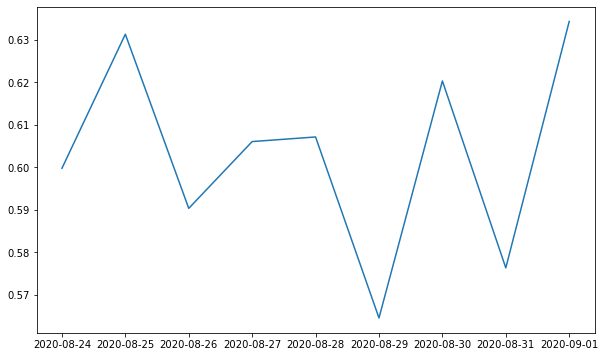

In [68]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6)) 
plt.plot(survey['collection_date'].unique(),MLA_Dis)